In [237]:
##### Bernoulli-Poisson Link factor analysis#####
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import numpy.matlib
import scipy
import scipy.linalg
import scipy.stats as ss
import itertools
from numpy.random import *
from scipy import optimize
from scipy.stats import norm
from scipy import sparse

In [238]:
##データの設定
k = 10   #基底数
d = 3000   #ノード数
hhpt = int(d*(d-1)/2)   #総ノード数

In [283]:
####応答変数を生成####
rp = 0
while True:
    rp = rp + 1
    print(rp)
    
    ##パラメータの生成
    #事前分布の設定
    alpha01 = 0.15; beta01 = 1.25
    alpha02 = 0.125; beta02 = 0.75

    #モデルパラメータを生成
    phi = np.random.gamma(alpha01, 1/beta01, d*k).reshape(d, k)
    omega = np.random.gamma(alpha02, 1/beta02, k*k).reshape(k, k)
    omega = np.diag(np.diag(omega)) + np.triu(omega, k=1) + np.triu(omega, k=1).T   #omegaを対称行列に変換
    phit = phi.copy(); omega = omega.copy()
    
    ##リンクを生成
    mu = np.dot(np.dot(phi, omega), phi.T)
    x = np.random.poisson(mu)
    x_vec = np.triu(x, k=1)[np.triu(mu, k=1) > 0]
    y_vec = np.array(x_vec > 0, dtype="int")
    mu_vec = np.triu(mu, k=1)[np.triu(mu, k=1) > 0]
    d_id1 = np.repeat(np.arange(d), d).reshape(d, d)[np.triu(x, k=1) > 0]
    d_id2 = np.repeat(np.arange(d), d).reshape(d, d, order="F")[np.triu(x, k=1) > 0]
    N = d_id1.shape[0]   #総リンク数
    
    #break条件
    if (N < 0.1 * hhpt) & (N >= 0.05 * hhpt):
        break

1
2
3
4
5
6
7
8


440585
1.326745122961517
91913


(array([4.28946e+05, 8.94100e+03, 1.89000e+03, 5.52000e+02, 1.64000e+02,
        5.60000e+01, 2.90000e+01, 4.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <a list of 10 Patch objects>)

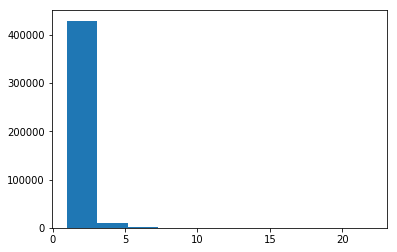

In [291]:
#生成したリンクと潜在変数を確認
print(N)
print(np.mean(x_vec[x_vec > 0]))
print(x_vec[x_vec > 1].shape[0])
plt.hist(x_vec[x_vec > 0])